In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from qutip import *
from scipy.optimize import curve_fit
from scipy.integrate import odeint
from scipy.integrate import simpson
from scipy import stats
plt.rcParams.update({'font.size': 14})

In [2]:
def model(z,t,myu,q0):
    omega=1
    x=z[0]
    y=z[1]
    dxdt=omega*y
    dydt=-myu*dxdt*(x**2-q0**2)-omega*x
    dzdt=[dxdt,dydt]
    return dzdt
def coper(N,q0,myu):
    cops=[]
    a=destroy(N)
    adag=a.dag()
    zeta=myu/12
    beta=myu/24
    eta=myu*(q0**2-1)/4
    const1=myu*(q0**2-1)
    const2=3*myu/4
    c1=sqrt(const1)*adag
    c2=sqrt(const2)*a**2
    c3=sqrt(myu)*(adag*a-0.5*adag**2)
    cops.append(c1)
    cops.append(c2)
    cops.append(c3)
    return cops
def hamil(N,omega,q0,myu):
    a=destroy(N)
    adag=a.dag()
    zeta=myu/12
    beta=myu/24
    eta=myu*(q0**2-1)/4
    H=omega*adag*a+(1j*zeta*(adag*a**3-(adag**3)*a))+(1j*beta*(a**4-adag**4))-(1j*eta*(a**2-adag**2))
    return H
def retdiag(rho,N):
    rhoii=[]
    n=[]
    for i in range(N):
        rhoii.append(rho.diag())
        n.append(i+1)
    return n,rhoii
def retdens(H,cops,N):
    expop=rand_dm(N)
    times = np.linspace(0.0, 100.0, 10000)
    result_dm = mesolve(H, expop, times, cops)
    return result_dm.states    
def Gauss(x, A, B, C):
    y = A*np.exp(-((x-B)/C)**2)
    return y
def expdecay(x,lam,A):
    y=A*np.exp(-lam*x)
    return y
def linfit(x,lam,C):
    y=lam*x+C
    return y
def sinfreq(x,A,omega,phi):
    y=A*np.sin(omega*x+phi)
    return y
def eig(myu,qo,omega):
    e=[((myu*q0**2)+1j*sqrt(4*omega**2-(myu**2)*q0**4))/2,((myu*q0**2)-1j*sqrt(4*omega**2-(myu**2)*q0**4))/2]
    return e
def retindex(tl,period):
    index2=0
    t2=0
    t2=tl[0]+abs(period)
    epi=0.01
    for i in range(len(tl)):
        if tl[i]<=(t2+epi) and tl[i]>=(t2-epi):
            index2=i
    return index2
def jacob(omega,q0,myu,q,p):
    j=np.zeros((2,2))
    j[0][0]=0
    j[0][1]=omega
    j[1][0]=-2*myu*q*p-omega
    j[1][1]=-myu*(q**2-q0**2)
    return j
def floquet(omega,q0,myu,position,momentum,times,T):
    final=np.identity(2)
    I=np.identity(2)
    for i in range(len(times)):
        q=position[i]
        p=momentum[i]
        final=final*(I+(T/len(times))*(jacob(omega,q0,myu,q,p)))
    return final
def square(list):
    return [i ** 2 for i in list]
    

In [3]:
q0=3
omega=1
N=30
x=np.linspace(-8,+8,200)
p=np.linspace(-8,+8,200)

In [4]:
myu=[0.001,0.009,0.03,0.05,0.07,0.1]
H=[]
cops=[]
ss=[]

In [5]:
for i in range(len(myu)):
    m=myu[i]
    h=hamil(N,omega,q0,m)
    c=coper(N,q0,m)
    s=steadystate(h,c)
    H.append(h)
    cops.append(c)
    ss.append(s)

In [89]:

dm1=retdens(H[0],cops[0],N)

In [7]:
q0

3

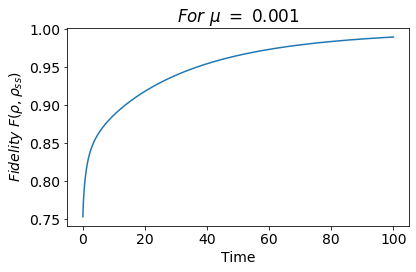

In [114]:
fid=[]
times = np.linspace(0.0, 100.0, 10000)
for i in range(len(dm1)):
    fid.append(fidelity(dm1[i],ss[0]))
plt.plot(times,fid)
plt.ylabel(r'$Fidelity$ $F(\rho,\rho_{ss})$')
plt.xlabel('Time')
plt.title(r'$For$ $\mu$ $=$ $0.001$')
plt.tight_layout()
plt.savefig("fid0.001.png")


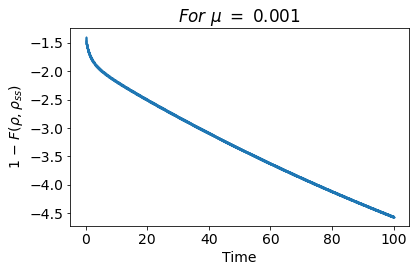

In [115]:
one=np.ones(len(fid))
oneminusfid=one-fid
plt.scatter(times,log(oneminusfid),s=0.5)
plt.ylabel(r'$1$ $-$ $F(\rho,\rho_{ss})$')
plt.xlabel('Time')
plt.title(r'$For$ $\mu$ $=$ $0.001$')
plt.tight_layout()
plt.savefig("1mfid0.001.png")


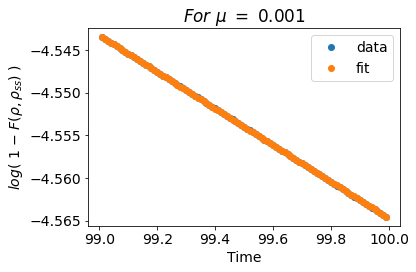

In [118]:
start=9900
end=9999
guess=np.random.rand(2)
parameters1, covariance1 = curve_fit(linfit, times[start:end], log(oneminusfid[start:end]),p0=guess)
fit_A = parameters1[0]
fit_B = parameters1[1]
#fit_y = expdecay(times, fit_A,fit_B)
fit_y=linfit(times[start:end],fit_A,fit_B)
plt.plot(times[start:end], log(oneminusfid[start:end]), 'o', label='data')
plt.plot(times[start:end], fit_y, 'o', label='fit',linewidth=1)
plt.ylabel(r'$log($ $1$ $-$ $F(\rho,\rho_{ss})$ $)$')
plt.xlabel('Time')
plt.title(r'$For$ $\mu$ $=$ $0.001$')
plt.tight_layout()
plt.savefig("fitlog1mfid0.001.png")
plt.tight_layout()
plt.legend()


In [119]:
fit_A

-0.021452095598395126

In [120]:
lamb[0]=fit_A

Text(0.5, 1.0, 'For myu=0.009')

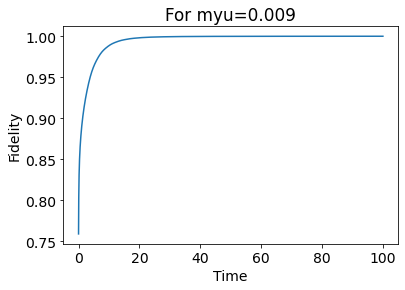

In [171]:
dm2=retdens(H[1],cops[1],N)
fid=[]
times = np.linspace(0.0, 100.0, 10000)
for i in range(len(dm2)):
    fid.append(fidelity(dm2[i],ss[1]))
plt.plot(times,fid)
plt.ylabel('Fidelity')
plt.xlabel('Time')
plt.title('For myu=0.009')


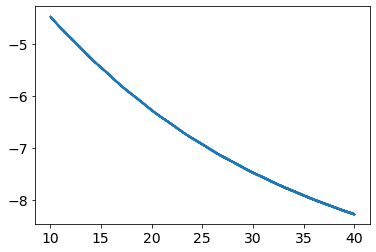

In [172]:
one=np.ones(len(fid))
oneminusfid=one-fid
plt.scatter(times[1000:4000],log(oneminusfid[1000:4000]),s=0.5)

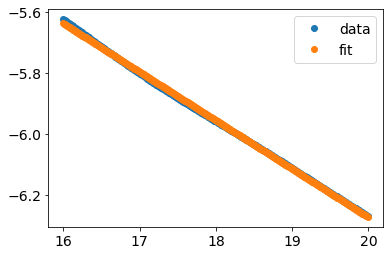

In [173]:
start=1600
end=2600
guess=np.random.rand(2)
parameters1, covariance1 = curve_fit(linfit, times[start:end], log(oneminusfid[start:end]),p0=guess)
fit_A = parameters1[0]
fit_B = parameters1[1]
#fit_y = expdecay(times, fit_A,fit_B)
fit_y=linfit(times[start:end],fit_A,fit_B)
plt.plot(times[start:end], log(oneminusfid[start:end]), 'o', label='data')
plt.plot(times[start:end], fit_y, 'o', label='fit')
plt.legend()

In [128]:
fit_A

-0.15633712697457525

In [130]:
lamb[1]=fit_A

Text(0.5, 1.0, 'For myu=0.03')

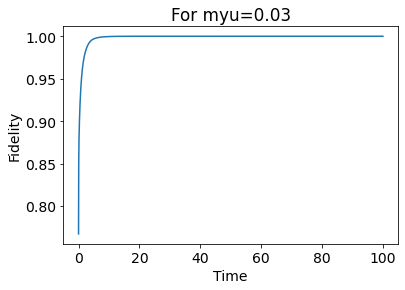

In [188]:
dm3=retdens(H[2],cops[2],N)
fid=[]
times = np.linspace(0.0, 100.0, 10000)
for i in range(len(dm3)):
    fid.append(fidelity(dm3[i],ss[2]))
plt.plot(times,fid)
plt.ylabel('Fidelity')
plt.xlabel('Time')
plt.title('For myu=0.03')


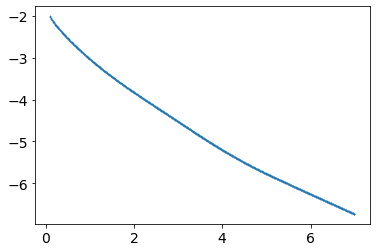

In [189]:
one=np.ones(len(fid))
oneminusfid=one-fid
plt.scatter(times[10:700],log(oneminusfid[10:700]),s=0.5)

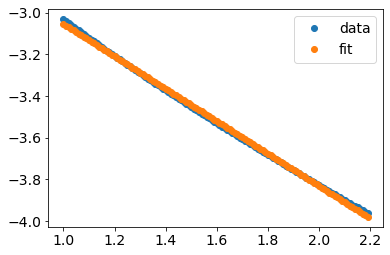

In [192]:
start=100
end=220
guess=np.random.rand(2)
parameters1, covariance1 = curve_fit(linfit, times[start:end], log(oneminusfid[start:end]),p0=guess)
fit_A = parameters1[0]
fit_B = parameters1[1]
#fit_y = expdecay(times, fit_A,fit_B)
fit_y=linfit(times[start:end],fit_A,fit_B)
plt.plot(times[start:end], log(oneminusfid[start:end]), 'o', label='data')
plt.plot(times[start:end], fit_y, 'o', label='fit')
plt.legend()

In [193]:
fit_A

-0.7778858889949638

In [194]:
lamb[2]=fit_A

Text(0.5, 1.0, 'For myu=0.05')

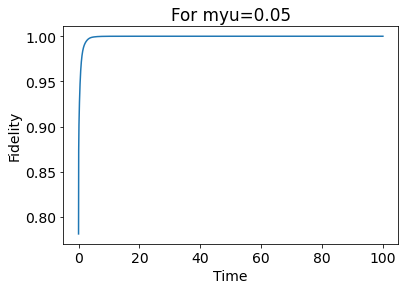

In [156]:
dm4=retdens(H[3],cops[3],N)
fid=[]
times = np.linspace(0.0, 100.0, 10000)
for i in range(len(dm4)):
    fid.append(fidelity(dm4[i],ss[3]))
plt.plot(times,fid)
plt.ylabel('Fidelity')
plt.xlabel('Time')
plt.title('For myu=0.05')


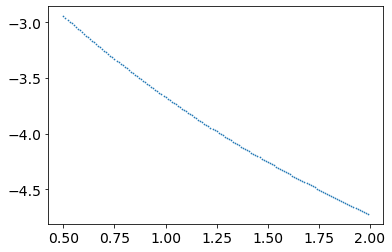

In [157]:
one=np.ones(len(fid))
oneminusfid=one-fid
plt.scatter(times[50:200],log(oneminusfid[50:200]),s=0.5)

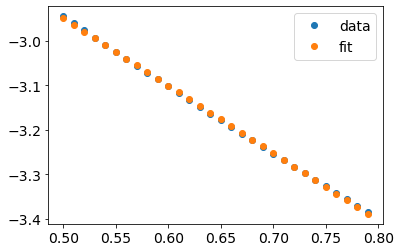

In [161]:
start=50
end=80
guess=np.random.rand(2)
parameters1, covariance1 = curve_fit(linfit, times[start:end], log(oneminusfid[start:end]),p0=guess)
fit_A = parameters1[0]
fit_B = parameters1[1]
#fit_y = expdecay(times, fit_A,fit_B)
fit_y=linfit(times[start:end],fit_A,fit_B)
plt.plot(times[start:end], log(oneminusfid[start:end]), 'o', label='data')
plt.plot(times[start:end], fit_y, 'o', label='fit')
plt.legend()

In [162]:
fit_A

-1.5215099381245352

In [163]:
lamb[3]=fit_A

In [27]:
lamb

[-0.025617654767250884,
 -0.1860632301549148,
 -0.6670007091370577,
 -1.4203992948269737]

Text(0.5, 1.0, 'For myu=0.07')

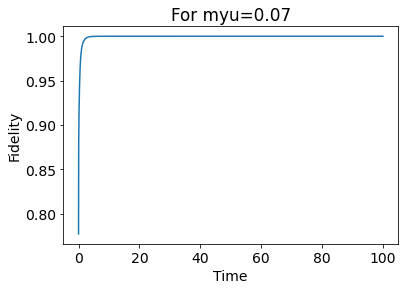

In [51]:
dm5=retdens(H[4],cops[4],N)
fid=[]
times = np.linspace(0.0, 100.0, 10000)
for i in range(len(dm4)):
    fid.append(fidelity(dm5[i],ss[4]))
plt.plot(times,fid)
plt.ylabel('Fidelity')
plt.xlabel('Time')
plt.title('For myu=0.07')

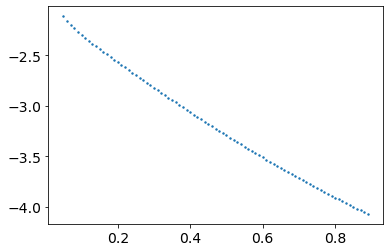

In [52]:
one=np.ones(len(fid))
oneminusfid=one-fid
plt.scatter(times[5:90],log(oneminusfid[5:90]),s=2)

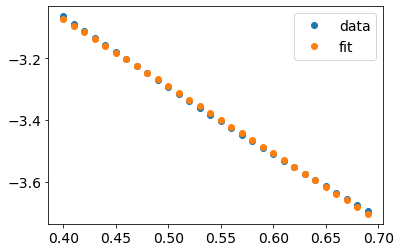

In [53]:
start=40
end=70
guess=np.random.rand(2)
parameters1, covariance1 = curve_fit(linfit, times[start:end], log(oneminusfid[start:end]),p0=guess)
fit_A = parameters1[0]
fit_B = parameters1[1]
#fit_y = expdecay(times, fit_A,fit_B)
fit_y=linfit(times[start:end],fit_A,fit_B)
plt.plot(times[start:end], log(oneminusfid[start:end]), 'o', label='data')
plt.plot(times[start:end], fit_y, 'o', label='fit')
plt.legend()

In [54]:
fit_A

-2.181647552715823

In [55]:
lamb[4]=fit_A

In [33]:
myu[5]

0.1

Text(0.5, 1.0, 'For myu=0.1')

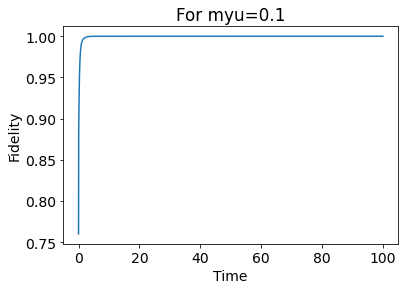

In [34]:
dm6=retdens(H[5],cops[5],N)
fid=[]
times = np.linspace(0.0, 100.0, 10000)
for i in range(len(dm6)):
    fid.append(fidelity(dm6[i],ss[5]))
plt.plot(times,fid)
plt.ylabel('Fidelity')
plt.xlabel('Time')
plt.title('For myu=0.1')

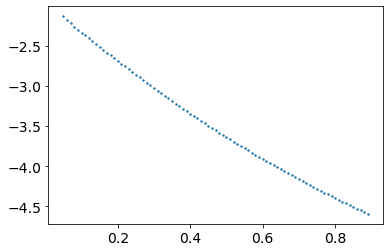

In [35]:
one=np.ones(len(fid))
oneminusfid=one-fid
plt.scatter(times[5:90],log(oneminusfid[5:90]),s=2)

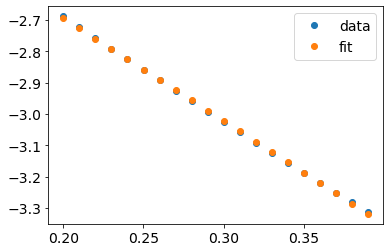

In [36]:
start=20
end=40
guess=np.random.rand(2)
parameters1, covariance1 = curve_fit(linfit, times[start:end], log(oneminusfid[start:end]),p0=guess)
fit_A = parameters1[0]
fit_B = parameters1[1]
#fit_y = expdecay(times, fit_A,fit_B)
fit_y=linfit(times[start:end],fit_A,fit_B)
plt.plot(times[start:end], log(oneminusfid[start:end]), 'o', label='data')
plt.plot(times[start:end], fit_y, 'o', label='fit')
plt.legend()

In [37]:
lamb.append(fit_A)

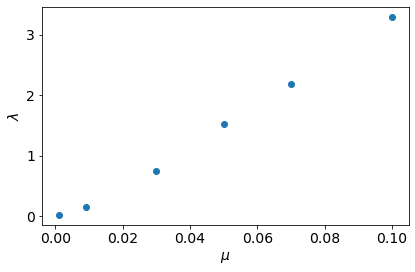

In [184]:
plt.scatter(myu,np.abs(lamb))
plt.ylabel(r'$\lambda$')
plt.xlabel(r'$\mu$')
plt.tight_layout()
plt.savefig('lammyu.png')


In [39]:
len(times)

10000

In [40]:
flexp=[-0.0035339617294815277,
 -0.07812232131595394,
 -0.27245448225588853,
 -0.4593171640883984,
 -0.6509590318546369,
 -0.9599822867872988]

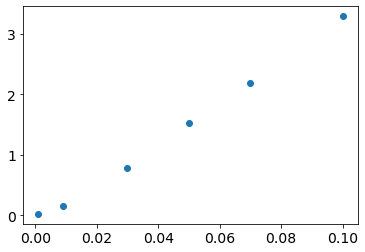

In [195]:
plt.scatter(myu,np.abs(lamb))

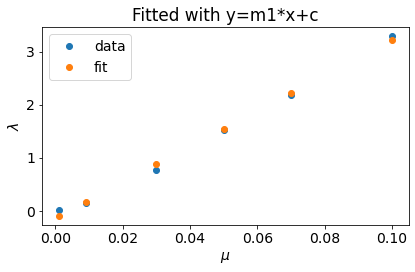

In [196]:
guess=np.random.rand(2)
parameters1, covariance1 = curve_fit(linfit, myu, np.abs(lamb),p0=guess)
fit_A = parameters1[0]
fit_B = parameters1[1]
fit_y=linfit(np.asarray(myu),fit_A,fit_B)
plt.plot (myu, np.abs(lamb), 'o', label='data')
plt.plot(myu, fit_y, 'o', label='fit')
plt.legend()
plt.ylabel(r'$\lambda$')
plt.xlabel(r'$\mu$')
plt.title('Fitted with y=m1*x+c')
plt.tight_layout()
plt.savefig('lammyufit.png')

In [197]:
m1=fit_A

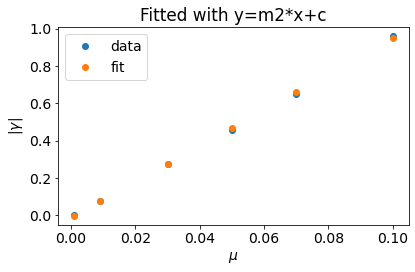

In [198]:
guess=np.random.rand(2)
parameters1, covariance1 = curve_fit(linfit, myu, np.abs(flexp),p0=guess)
fit_A = parameters1[0]
fit_B = parameters1[1]
fit_y=linfit(np.asarray(myu),fit_A,fit_B)
plt.plot (myu, np.abs(flexp), 'o', label='data')
plt.plot(myu, fit_y, 'o', label='fit')
plt.legend()
plt.ylabel(r'$|\gamma|$')
plt.xlabel(r'$\mu$')
plt.title('Fitted with y=m2*x+c')
plt.tight_layout()
plt.savefig('gammyufit.png')

In [199]:
m2=fit_A

In [200]:
m1,m2

(33.49330444779313, 9.60678642675768)

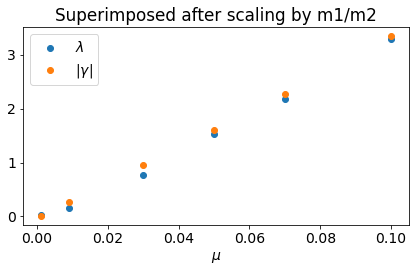

In [201]:
plt.scatter(myu,np.abs(lamb),label=r'$\lambda$')
plt.scatter(myu,(m1/m2)*np.asarray(np.abs(flexp)),label=r'$|\gamma|$')
plt.legend()
plt.xlabel(r'$\mu$')
plt.title('Superimposed after scaling by m1/m2')
plt.tight_layout()
plt.savefig("lamgamsuper.png")

In [48]:
m1/m2

3.5888321837588575

In [49]:
np.abs(lamb),3*np.asarray(flexp)

(array([0.02561765, 0.18606323, 0.66700071, 1.42039929, 2.45888091,
        3.29369793]),
 array([-0.01060189, -0.23436696, -0.81736345, -1.37795149, -1.9528771 ,
        -2.87994686]))

In [50]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(np.abs(lamb), (m1/m2)*np.asarray(np.abs(flexp)))

coefficient_of_dermination

0.977215953875236